<a href="https://colab.research.google.com/github/joannevarughese/CIT-Capstone/blob/main/Varughese_Joanne_Capstone_Restaurant_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install flask-ngrok
!ngrok authtoken '2e0iXAVqxQI0sfhRi3agLYo4gvS_2hGbmRsfq5jEBixS8QdK3'

/bin/bash: line 1: ngrok: command not found


In [39]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import os

In [40]:
df = pd.read_csv('/content/drive/MyDrive/RestaurantRecommendationData/restaurants.csv') #importing dataset

In [41]:
df.describe()

,id,position,score,ratings,lat,lng
count,63469.000000,63469.000000,35302.000000,35302.000000,63469.000000,63469.000000
mean,31735.000000,86.692102,4.551431,74.887060,36.585019,-96.715114
std,18322.066455,79.280129,0.300675,69.874057,6.458959,14.438166
min,1.000000,1.000000,1.300000,10.000000,0.000000,-123.841240
25%,15868.000000,18.000000,4.400000,25.000000,30.442221,-98.569760
50%,31735.000000,61.000000,4.600000,52.000000,34.707265,-96.764330
75%,47602.000000,141.000000,4.800000,100.000000,40.884903,-87.938729
max,63469.000000,300.000000,5.000000,500.000000,48.963950,0.000000


In [42]:
df

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700
...,...,...,...,...,...,...,...,...,...,...,...
63464,63465,2,IHOP (4321 N 10th St),4.6,56.0,"American, Breakfast and Brunch, burger, Comfor...",$,"4321 N 10th St, MC ALLEN, TX, 78504",78504,26.242853,-98.223984
63465,63466,29,Feldman's - N 10th Street,NaN,NaN,NaN,NaN,"3010 N 10th Street, Mc Allen, TX,",NaN,26.230764,-98.224922
63466,63467,27,Feldman's - N 23rd St,NaN,NaN,NaN,NaN,"6101 N 23rd Street #B, Mc Allen, TX,",NaN,26.260353,-98.236755
63467,63468,19,Church's Chicken (620 S. 10th Street),4.3,17.0,"Fast Food, Family Meals",$,"620 S. 10th Street, McAllen, TX, 78501",78501,26.197333,-98.231369


In [43]:
ratings_df = df['ratings']
ratings_df.dropna(inplace=True) #gets rid of NaN values
ratings_df.head()

4     22.0
6     63.0
13    44.0
15    20.0
18    48.0
Name: ratings, dtype: float64

In [44]:
ratings_df.info()

<class 'pandas.core.series.Series'>
Int64Index: 35302 entries, 4 to 63467
Series name: ratings
Non-Null Count  Dtype  
--------------  -----  
35302 non-null  float64
dtypes: float64(1)
memory usage: 551.6 KB


<Axes: xlabel='ratings', ylabel='count'>

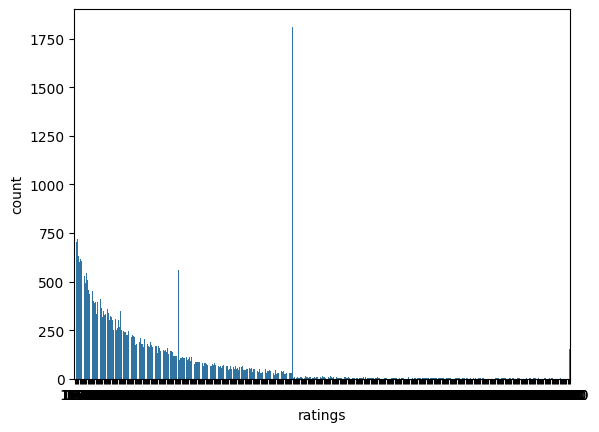

In [45]:
sns.countplot(x=ratings_df)

In [37]:
print("If one of the factors doesn't apply, just hit enter. Also, zip code is mandatory.")
zipCode=input("Enter your zip code: ")
#city= input("Enter you city:")
categoryInput=input("Enter your category of food you're interested to eat. ex:(Chinese, Halal, Seafood, Healthy, Fast Food): ")

#categoryInput.upper() #turn into uppercase

priceInput=input("Enter the price range you are looking for ex:($, $$, or $$$?): ")
userScore=input("Do you want a minimum score (1-5): ")
userRatings=input("Do you want a minimum amount of reviews for each restaurants selected: ")

If one of the factors doesn't apply, just hit enter. Also, zip code is mandatory.
Enter your zip code: 23233
Enter your category of food you're interested to eat. ex:(Chinese, Halal, Seafood, Healthy, Fast Food): Fast Food
Enter the price range you are looking for ex:($, $$, or $$$?): 
Do you want a minimum score (1-5): 1
Do you want a minimum amount of reviews for each restaurants selected: 


In [46]:
filter_list= [zipCode]

filterDF = df.loc[df['zip_code'].isin(filter_list)]
'''
if city != '' :
  filterDF = filterDF[df['full_address'].str.contains(city)==True]
'''

if priceInput != '' :
  filterDF = filterDF[df['price_range'].str.contains(priceInput)==True]

if userScore != '':
  filterDF = filterDF[df['score'] >= float(userScore)]

if userRatings != '':
  filterDF = filterDF[df['ratings'] > int(userRatings)]

if categoryInput != '' :
  filterDF = filterDF[df['category'].str.contains(categoryInput)==True] #adding only what the category of categoryInput

filterDF = filterDF[df['category'].str.contains('Convenience')==False] #taking out any resturants that has that specific value like cafe in category
filterDF = filterDF[df['category'].str.contains('Desserts')==False]
filterDF = filterDF[df['category'].str.contains('Juice')==False]
filterDF = filterDF[df['category'].str.contains('Bakery')==False]
filterDF = filterDF[df['category'].str.contains('Cafe')==False]
#df.loc[df['zip_code']=='23060']

<ipython-input-46-12b60bf2d1e9>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filterDF = filterDF[df['score'] >= float(userScore)]
<ipython-input-46-12b60bf2d1e9>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filterDF = filterDF[df['category'].str.contains(categoryInput)==True] #adding only what the category of categoryInput
<ipython-input-46-12b60bf2d1e9>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filterDF = filterDF[df['category'].str.contains('Convenience')==False] #taking out any resturants that has that specific value like cafe in category
<ipython-input-46-12b60bf2d1e9>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filterDF = filterDF[df['category'].str.contains('Desserts')==False]
<ipython-input-46-12b60bf2d1e9>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filterDF = filterDF[df['category'].str.con

In [47]:

filterDF

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
27331,27332,48,Arby's (4250 Pouncey Tract),4.2,24.0,"American, Sandwich, Fast Food",$,"4250 Pouncey Tract, Richmond, VA, 23233",23233,37.654028,-77.611818
27355,27356,75,Chick-fil-A (3380 Pump Rd),4.9,142.0,"American, Fried Chicken, Family Meals, Souther...",$,"3380 Pump Rd, Richmond, VA, 23233",23233,37.650076,-77.613404
27368,27369,25,Wendy's (2120 John Rolfe Parkway),4.8,24.0,"American, Burgers, Fast Food",$,"2120 John Rolfe Parkway, Richmond, VA, 23233",23233,37.621087,-77.623936


In [48]:
rsltdf = df.query('zip_code=="23233" and category=="Indian"' ) #testing with queries
rsltdf

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng


#first, rating and number of reviews. then, cost. then, cuisine. Next, Take the highest rated resturants and time it with the number of ratings and highest value is best. zip code although is highest ranked and then ratings alone then both rating and number of reviews.

In [49]:
score_df= df['score']
score_df.dropna(inplace=True)
#userInput = input("Enter a : ")
#total_score_df= (score_df.loc[:, "score"] + ratings_df.loc["ratings")
score_df

4        4.7
6        4.7
13       4.6
15       5.0
18       4.9
        ... 
63448    4.8
63460    4.4
63462    5.0
63464    4.6
63467    4.3
Name: score, Length: 35302, dtype: float64

In [50]:
df_length = len(df)
n_scores = len(df['score'].unique())
n_ratings = len(df['ratings'].unique())
print(f"Length of data frame: {df_length}")
print(f"Scores: {n_scores}")
print(f"Ratings: {n_ratings}")
#n_users = len(ratings_df['userId'].unique())

Length of data frame: 63469
Scores: 34
Ratings: 434


In [51]:
mean_rating = filterDF['ratings'].mean() #mean of ratings column
#filterDF.groupby('zip_code')['ratings'].mean()
#.apply(lambda x: x.mean().index[0])
mean_score = filterDF['score'].mean()
print(mean_rating)
print(mean_score)

63.333333333333336
4.633333333333334


In [52]:
m= filterDF['ratings'].quantile(.50)
m

24.0

In [53]:
'''
# loop through the rows using iterrows()
list_ratings = df['ratings'].tolist()
list_score = df['score'].tolist()

for index, row in filterDF.iterrows():
     n_ranking = (list_score[index]*mean_rating)+list_ratings[index]

#def test(x):
for index, row in filterDF.iterrows():
   n_ranking= (row['score']* mean_rating)+row['ratings']
   #df['rankings']=n_ranking
   print(n_ranking)
  # list = df[''].tolist() #can make smth a list
   df.assign(rankings= [n_ranking])
'''
#filterDF['ranking'] = (filterDF['score']*mean_rating)+ filterDF['ratings'] #equation to get final value to determine the best resturant

filterDF['ranking'] = (filterDF['ratings']/(filterDF['ratings']+ m))* mean_rating + (m/(filterDF['ratings']+m))* mean_score

print(df)

# df.apply(test, axis=1)
   # add the zip code next to the columns that correspond (hopefully instead of ID number)

          id  position                                            name  score  \
0          1        19               PJ Fresh (224 Daniel Payne Drive)    NaN   
1          2         9                  J' ti`'z Smoothie-N-Coffee Bar    NaN   
2          3         6  Philly Fresh Cheesesteaks (541-B Graymont Ave)    NaN   
3          4        17         Papa Murphy's (1580 Montgomery Highway)    NaN   
4          5       162                Nelson Brothers Cafe (17th St N)    4.7   
...      ...       ...                                             ...    ...   
63464  63465         2                           IHOP (4321 N 10th St)    4.6   
63465  63466        29                       Feldman's - N 10th Street    NaN   
63466  63467        27                           Feldman's - N 23rd St    NaN   
63467  63468        19           Church's Chicken (620 S. 10th Street)    4.3   
63468  63469         9                       7-Eleven (1600 S 23rd St)    NaN   

       ratings             

In [54]:
filterDF.dropna(inplace=True) #get rid of NaN values
filterDF = filterDF.sort_values(by = ['ranking', 'score', 'ratings'], ascending=False) #sort the dataset so that best rated places are top to bottom

In [55]:
filterDF

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,ranking
27355,27356,75,Chick-fil-A (3380 Pump Rd),4.9,142.0,"American, Fried Chicken, Family Meals, Souther...",$,"3380 Pump Rd, Richmond, VA, 23233",23233,37.650076,-77.613404,54.846586
27368,27369,25,Wendy's (2120 John Rolfe Parkway),4.8,24.0,"American, Burgers, Fast Food",$,"2120 John Rolfe Parkway, Richmond, VA, 23233",23233,37.621087,-77.623936,33.983333
27331,27332,48,Arby's (4250 Pouncey Tract),4.2,24.0,"American, Sandwich, Fast Food",$,"4250 Pouncey Tract, Richmond, VA, 23233",23233,37.654028,-77.611818,33.983333


In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Input Data</title>
</head>
<body>
    <form method="POST">
        <input type="text" name="data" placeholder="Enter data">
        <input type="submit" value="Submit">
    </form>
</body>
</html>


In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Data Frame</title>
</head>
<body>
    {{ table|safe }}
</body>
</html>


In [ ]:
'''
from flask import Flask, render_template, request

app = Flask(__name__)

@app.route('/form')
def form():
  return render_template('form.html')  # Display the HTML form template

@app.route('/data/', methods=['POST', 'GET'])
def data():
  if request.method == 'GET':
    return "The URL /data is accessed directly. Try going to '/form' to submit the form."
  elif request.method == 'POST':
        form_data = request.form  # Retrieve form data
        return render_template('data.html', form_data=form_data)  # Display the data

if __name__ == '_main_':
    app.run(host='localhost', port=5000)


#old code:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
   return 'Hello World’

if __name__ == '__main__':
   app.run()
 '''

from flask import Flask, request, jsonify
import pandas as pd

app = Flask(__name__)

@app.route('/get-data', methods=['POST'])
def get_data():
    zip_code = request.json.get('zip_code')
    #df = pd.read_csv('your_data.csv') # Load your DataFrame
    #filtered_data = df[df['zip_code'] == zip_code]
    #return jsonify(filtered_data.to_dict(orient='records'))
    return jsonify(filterDF.to_dict(orient='records'))
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [57]:
# import ipywidgets as widgets
# from IPython.display import display

# text = widgets.Text(
#     value='',
#     placeholder='Type something',
#     description='Input:',
#     disabled=False
# )
# button = widgets.Button(description='Submit')
# output = widgets.Output()

# def on_button_clicked(b):
#     with output:
#         # Here you can call your Flask app's endpoint with the input from the text widget
#         # For demonstration, let's just print the input
#         print(filterDf)

# button.on_click(on_button_clicked)
# display(text, button, output)

import ipywidgets as widgets
from IPython.display import display
import requests

text = widgets.Text(
    value='',
    placeholder='Enter Zip Code',
    description='Zip Code:',
    disabled=False
)
button = widgets.Button(description='Submit')
output = widgets.Output()

def on_button_clicked(b):
    with output:
        url = 'http://localhost:5000/get-data' # Adjust the URL as needed
        data = {'zip_code': text.value}
        response = requests.post(url, json=data)
        if response.status_code == 200:
            display(pd.DataFrame(response.json()))
        else:
            print("Error:", response.status_code)

button.on_click(on_button_clicked)
display(text, button, output)


Text(value='', description='Input:', placeholder='Type something')

Button(description='Submit', style=ButtonStyle())

Output()